In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/User/Downloads/traffic.csv")
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [3]:
# Convert DateTime to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract useful features from DateTime
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month

# Drop original DateTime column
df.drop('DateTime', axis=1, inplace=True)

df.head()


,Junction,Vehicles,ID,Hour,Day,Month
0,1,15,20151101001,0,1,11
1,1,13,20151101011,1,1,11
2,1,10,20151101021,2,1,11
3,1,7,20151101031,3,1,11
4,1,9,20151101041,4,1,11


In [4]:
X = df.drop("Vehicles", axis=1)   # Features
y = df["Vehicles"]               # Target


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   ID        48120 non-null  int64
 3   Hour      48120 non-null  int32
 4   Day       48120 non-null  int32
 5   Month     48120 non-null  int32
dtypes: int32(3), int64(3)
memory usage: 1.7 MB


Junction    0
Vehicles    0
ID          0
Hour        0
Day         0
Month       0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df.describe()

,Junction,Vehicles,ID,Hour,Day,Month
count,48120.000000,48120.000000,4.812000e+04,48120.000000,48120.000000,48120.000000
mean,2.180549,22.791334,2.016330e+10,11.500000,15.700748,5.884289
std,0.966955,20.750063,5.944854e+06,6.922258,8.784073,3.569872
min,1.000000,1.000000,2.015110e+10,0.000000,1.000000,1.000000
25%,1.000000,9.000000,2.016042e+10,5.750000,8.000000,3.000000
50%,2.000000,15.000000,2.016093e+10,11.500000,16.000000,5.000000
75%,3.000000,29.000000,2.017023e+10,17.250000,23.000000,9.000000
max,4.000000,180.000000,2.017063e+10,23.000000,31.000000,12.000000


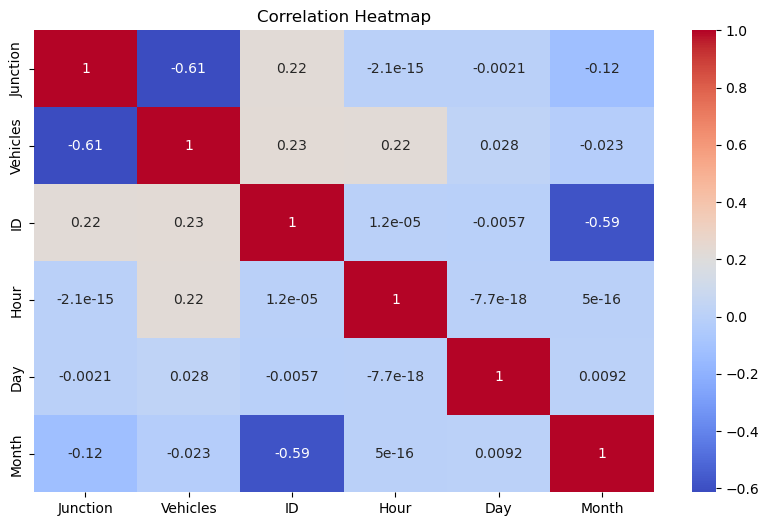

In [8]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

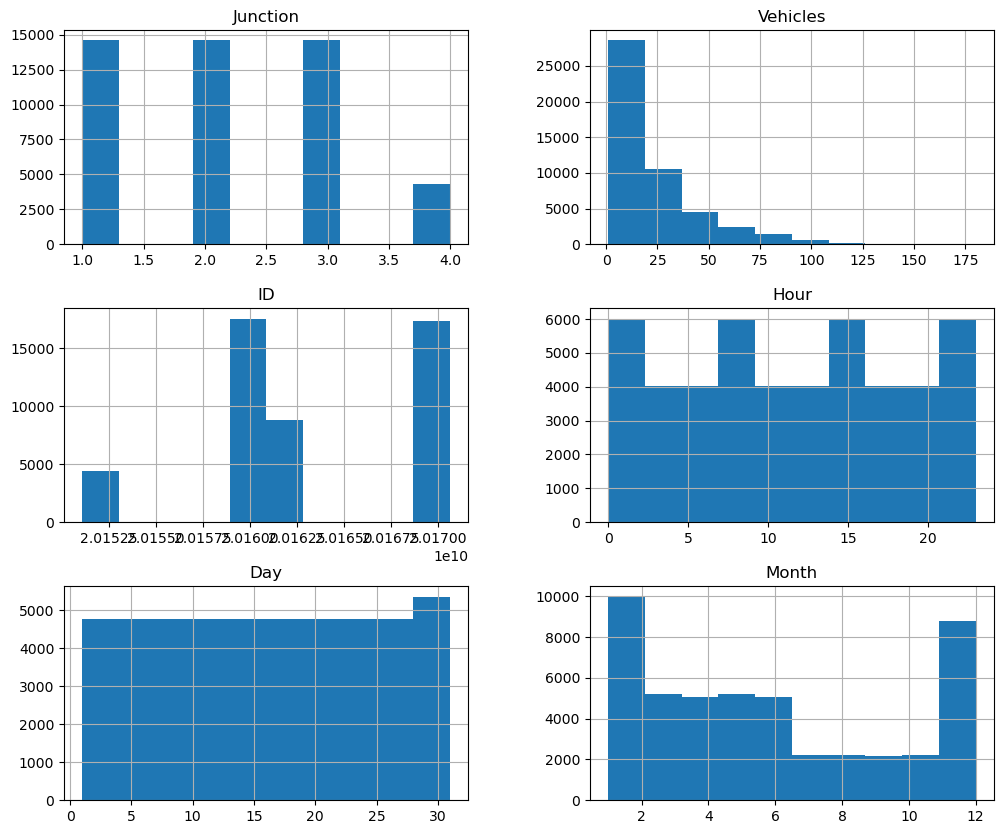

In [9]:
# Distribution plots
df.hist(figsize=(12,10))
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr = LinearRegression()
svm = SVR()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)


In [13]:
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
models = {"Linear Regression": lr, "SVM": svm, "Decision Tree": dt,"Random Forest": rf}

results = []

In [15]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)   # ORIGINAL SCORE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append([name, score, rmse, r2])

In [16]:
results_df = pd.DataFrame(results, columns=["Model", "Original Score", "RMSE", "R2 Score"])
results_df

,Model,Original Score,RMSE,R2 Score
0,Linear Regression,0.583478,13.028893,0.583478
1,SVM,-0.131512,21.474264,-0.131512
2,Decision Tree,0.934507,5.166362,0.934507
3,Random Forest,0.958933,4.091070,0.958933


In [17]:
best_model = results_df.sort_values(by="Original Score", ascending=False).iloc[0]
print("BEST MODEL:")
print(best_model)

BEST MODEL:
Model             Random Forest
Original Score         0.958933
RMSE                    4.09107
R2 Score               0.958933
Name: 3, dtype: object


In [18]:
import pickle
# Save model
with open("traffic_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as traffic_model.pkl")


Model saved as traffic_model.pkl


In [19]:
# Load model
with open("traffic_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [20]:
# Sample prediction
sample_input = [[10, 15, 6, 2017, 2]]  # Hour, Day, Month, Year, Junction
prediction = loaded_model.predict(sample_input)

print("Predicted Traffic:", int(prediction[0]))


Predicted Traffic: 4


C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
